# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** [Ajwa Nabawiya]
- **Email:** [rayykaraya@gmail.com]
- **ID Dicoding:** [ajwanabawiya1412]

## Import Semua Packages/Library yang Digunakan

In [2]:
import os
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ajwanabawiya","key":"29ff5cb18980415223627b1983475ea3"}'}

## Data Preparation

### Data Loading

In [3]:
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
!kaggle datasets download -d aryamanporwal12/vlm4bio-10k-images
if not os.path.exists('img_data'):
    os.makedirs('img_data')
!unzip vlm4bio-10k-images -d img_data

Streaming output truncated to the last 5000 lines.
  inflating: img_data/10K/Fish/INHS_FISH_84380.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84381.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84402.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84412.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84433.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_8446.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84460.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84466.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84467.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84489.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_8451.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84545.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84558.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84580.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84601.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84607.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84617.jpg  
  inflating: img_data/10K/Fish/INHS_FISH_84622.jpg

### Data Preprocessing

Menampilkan gambar untuk kelas: Fish


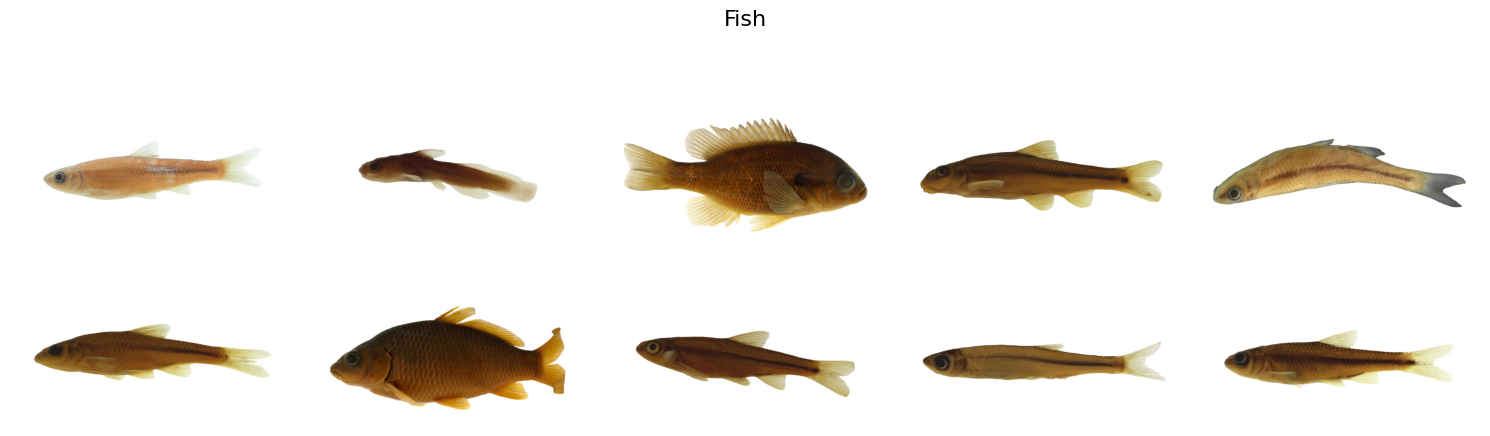

Menampilkan gambar untuk kelas: Bird


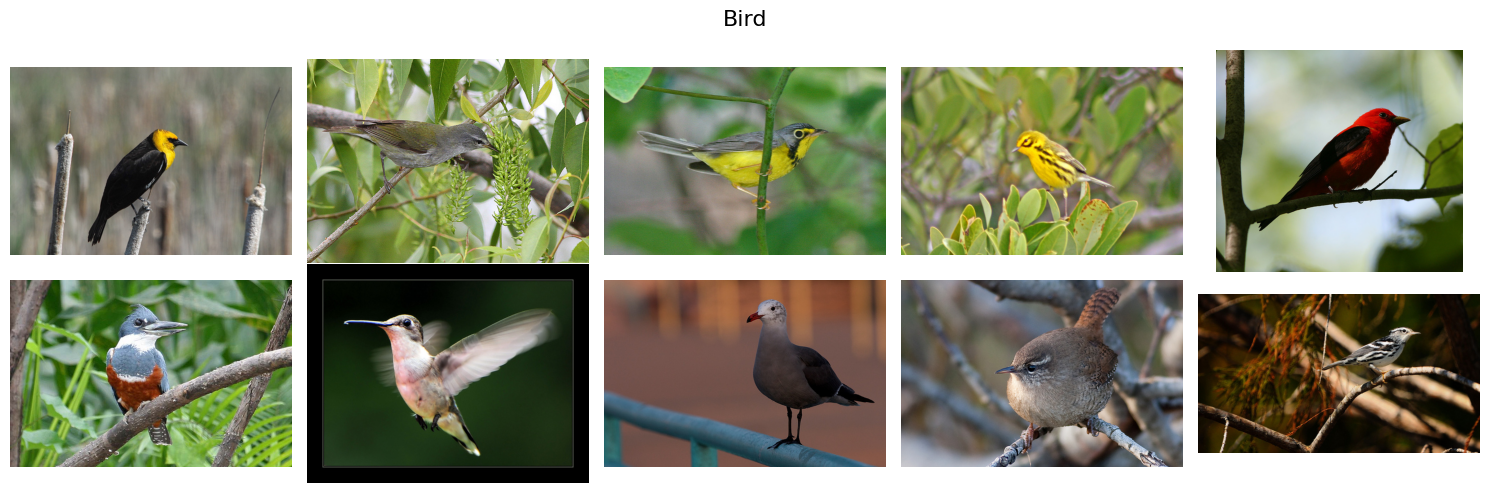

Menampilkan gambar untuk kelas: Butterfly


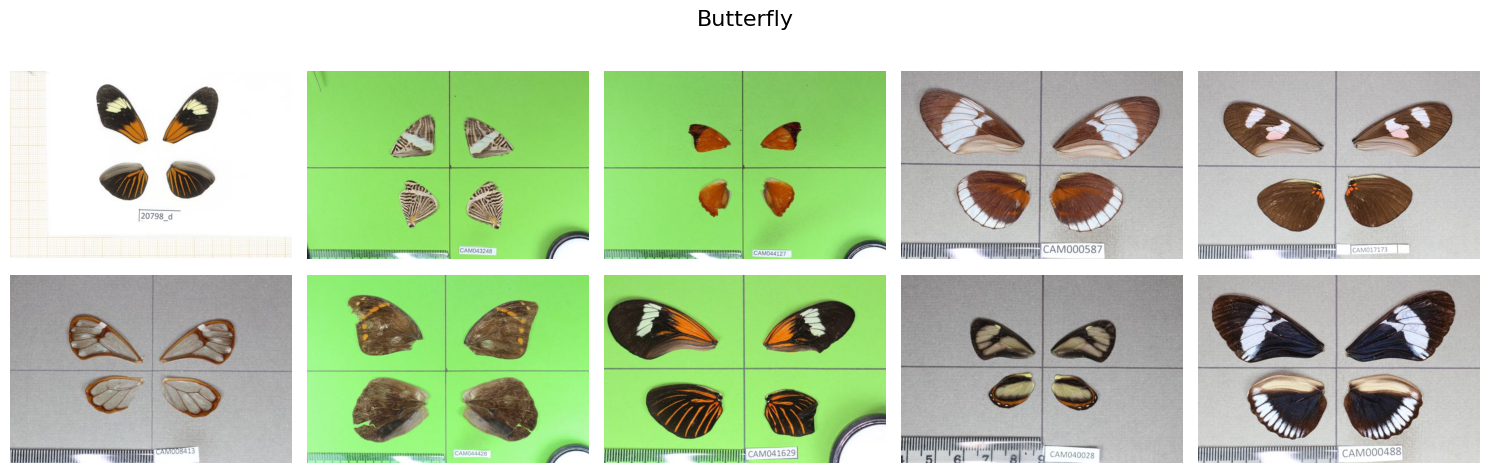

In [4]:
import random

dataset_path = '/content/img_data/10K'

class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

for class_name in class_folders:
    class_path = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    if len(image_files) == 0:
        continue  # Skip jika tidak ada gambar

    random.shuffle(image_files)

    print(f"Menampilkan gambar untuk kelas: {class_name}")

    plt.figure(figsize=(15, 5))

    for i, img_name in enumerate(image_files[:10]):  # tampilkan 10 gambar
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)

        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.suptitle(class_name, fontsize=16)
    plt.tight_layout()
    plt.show()

In [5]:
from collections import defaultdict

# Pastikan path dataset
dataset_path = '/content/img_data/10K'  # Sesuaikan ini kalau foldernya beda

# Cari semua folder (kelas)
kelas_list = [folder for folder in sorted(os.listdir(dataset_path)) if os.path.isdir(os.path.join(dataset_path, folder))]

# Inisialisasi dictionary
jumlah_gambar_per_kelas = defaultdict(int)
ukuran_gambar_per_kelas = defaultdict(list)
ukuran_unik_per_kelas = defaultdict(set)

# Proses setiap kelas
for kelas in kelas_list:
    kelas_path = os.path.join(dataset_path, kelas)
    gambar_list = [f for f in os.listdir(kelas_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    jumlah_gambar_per_kelas[kelas] = len(gambar_list)

    for nama_gambar in gambar_list:
        path_gambar = os.path.join(kelas_path, nama_gambar)
        try:
            with Image.open(path_gambar) as img:
                ukuran = img.size  # (width, height)
                ukuran_gambar_per_kelas[kelas].append(ukuran)
                ukuran_unik_per_kelas[kelas].add(ukuran)  # Masukkan ke set
        except Exception as e:
            print(f"[Warning] Gagal membaca gambar: {path_gambar} ({e})")

# Tampilkan hasil
print("="*50)
# Total kelas
total_kelas = len(jumlah_gambar_per_kelas)
print(f"Jumlah kelas ditemukan: {total_kelas}")

# Total gambar
total_gambar = sum(jumlah_gambar_per_kelas.values())
print(f"Total jumlah gambar: {total_gambar}")
print("="*50)

# Jumlah gambar per kelas
print("\nJumlah gambar per kelas:")
for kelas, jumlah in jumlah_gambar_per_kelas.items():
    print(f"  - {kelas}: {jumlah} gambar")

# Ukuran gambar rata-rata per kelas
print("\nUkuran gambar rata-rata per kelas:")
for kelas, ukuran_list in ukuran_gambar_per_kelas.items():
    if ukuran_list:
        rata2_lebar = sum(w for w, h in ukuran_list) / len(ukuran_list)
        rata2_tinggi = sum(h for w, h in ukuran_list) / len(ukuran_list)
        print(f"  - {kelas}: {int(rata2_lebar)} x {int(rata2_tinggi)} piksel")
    else:
        print(f"  - {kelas}: Tidak ada gambar yang valid.")

# Jumlah ukuran resolusi unik per kelas
print("\nJumlah ukuran resolusi unik per kelas:")
for kelas, ukuran_set in ukuran_unik_per_kelas.items():
    print(f"  - {kelas}: {len(ukuran_set)} ukuran unik")
print("="*50)

Jumlah kelas ditemukan: 3
Total jumlah gambar: 31452

Jumlah gambar per kelas:
  - Bird: 11092 gambar
  - Butterfly: 10013 gambar
  - Fish: 10347 gambar

Ukuran gambar rata-rata per kelas:
  - Bird: 467 x 385 piksel
  - Butterfly: 499 x 333 piksel
  - Fish: 2404 x 983 piksel

Jumlah ukuran resolusi unik per kelas:
  - Bird: 1117 ukuran unik
  - Butterfly: 104 ukuran unik
  - Fish: 8252 ukuran unik


Gambar sudah memiliki resolusi yang berbeda-beda tiap kelas dengan 1117 resolusi yang berbeda pada Kelas Bird, 104 resolusi yang berbeda pada kelas Butterfly dan 8252 resolusi yang berbeda pada kelas Fish.

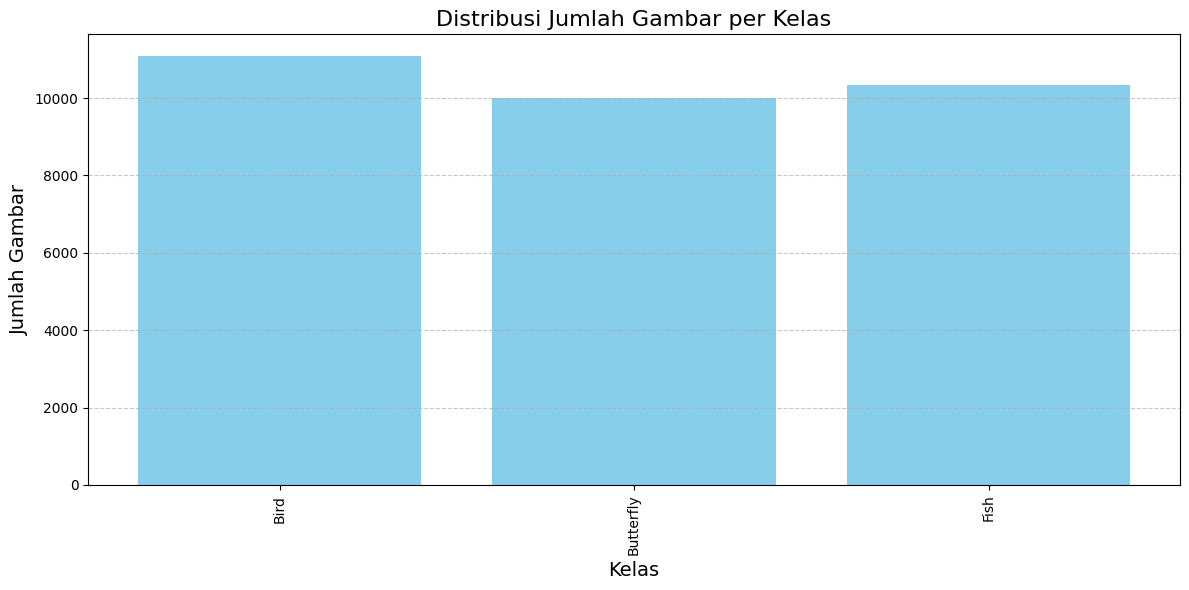

In [6]:
# Data
kelas = list(jumlah_gambar_per_kelas.keys())
jumlah = list(jumlah_gambar_per_kelas.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(kelas, jumlah, color='skyblue')
plt.title('Distribusi Jumlah Gambar per Kelas', fontsize=16)
plt.xlabel('Kelas', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Perbedaan jumlah gambar antara kelas-kelas tidak terlalu besar (kelas Bird memiliki sekitar 11.000 gambar dan kelas Butterfly serta Fish memiliki lebih dari 10.000 gambar). Dalam situasi seperti ini, meskipun ada ketidakseimbangan, imbalanced data tidak terlalu ekstrem, dan model mungkin masih bisa berfungsi dengan baik tanpa terlalu banyak penyesuaian.

Kode ini menggunakan ImageDataGenerator untuk memproses gambar secara real-time dari folder yang berisi gambar yang terstruktur berdasarkan kelas. Gambar dinormalisasi ke rentang [0, 1] dengan rescale=1./255, diubah ukurannya menjadi 128x128 piksel, dan dibaca dalam batch berukuran 32. Label kelas dikembalikan dalam bentuk integer dengan class_mode='sparse', dan gambar-gambar diacak menggunakan shuffle=True. Pendekatan ini memungkinkan pemrosesan data otomatis saat melatih model, tanpa perlu memuat seluruh dataset sekaligus.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Inisialisasi ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi pixel ke [0, 1]

# Load data dari folder
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=42
)

Found 31452 images belonging to 3 classes.


In [8]:
import numpy as np

# Set untuk menyimpan bentuk unik semua gambar
unique_shapes = set()
all_labels = []

# Hitung total batch
total_samples = data_generator.samples
batch_size = data_generator.batch_size
steps = int(np.ceil(total_samples / batch_size))

# Loop semua batch
for i in range(steps):
    images, labels = next(data_generator)

    # Simpan bentuk gambar
    for img in images:
        unique_shapes.add(img.shape)

    # Simpan label
    all_labels.extend(labels)

# Output total
print(f"Jumlah total gambar: {total_samples}")
print(f"Jumlah total batch: {steps}")

# Cek bentuk gambar
print("\n[INFO] Cek bentuk gambar:")
if len(unique_shapes) == 1:
    bentuk = unique_shapes.pop()
    print(f"Semua gambar berhasil diubah ke ukuran: {bentuk} (contoh: (128, 128, 3))")
else:
    print(f"Terdapat variasi bentuk gambar: {unique_shapes}")

# Statistik label
labels_np = np.array(all_labels)
unique_labels, counts = np.unique(labels_np, return_counts=True)

print("\n[INFO] Distribusi label:")
for label, count in zip(unique_labels, counts):
    # Mapping label ke nama kelas
    class_name = list(data_generator.class_indices.keys())[int(label)]
    print(f"  - Label {int(label)} ({class_name}): {count} gambar")


Jumlah total gambar: 31452
Jumlah total batch: 983

[INFO] Cek bentuk gambar:
Semua gambar berhasil diubah ke ukuran: (128, 128, 3) (contoh: (128, 128, 3))

[INFO] Distribusi label:
  - Label 0 (Bird): 11092 gambar
  - Label 1 (Butterfly): 10013 gambar
  - Label 2 (Fish): 10347 gambar


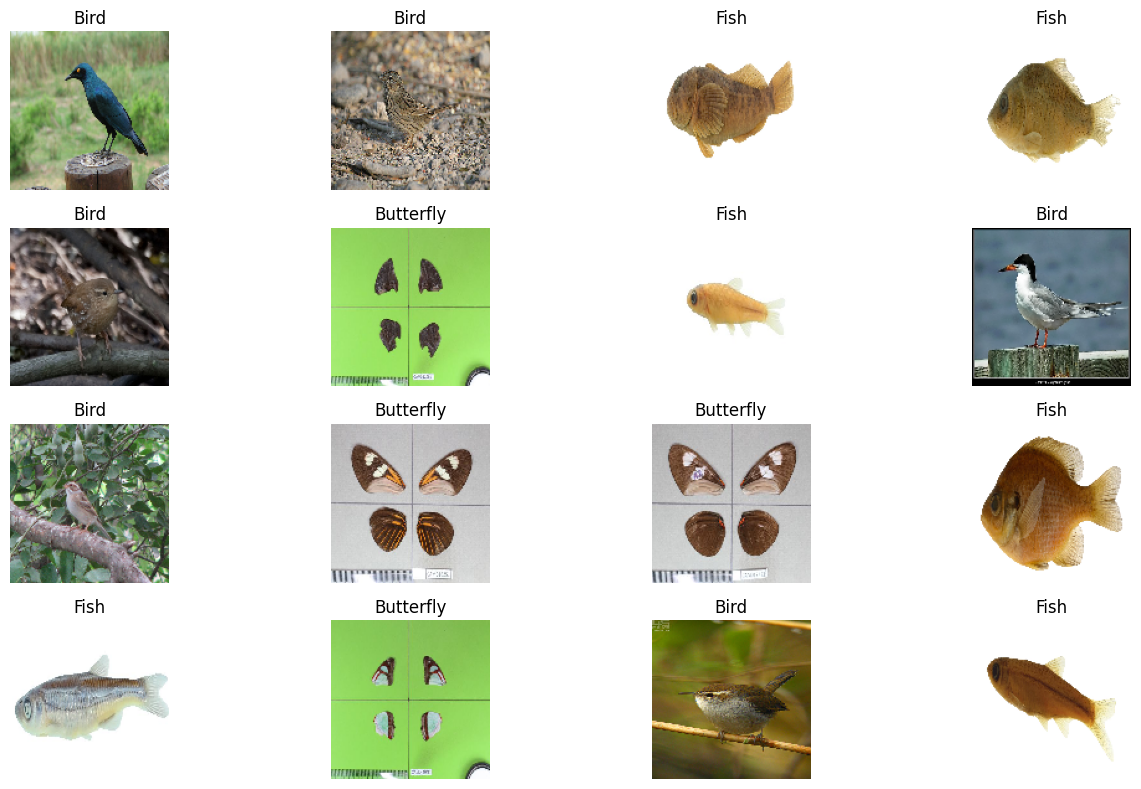

In [9]:
import matplotlib.pyplot as plt

# Ambil satu batch data (misalnya batch pertama)
images, labels = next(data_generator)

# Konversi label numerik ke nama kelas
class_indices = data_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Jumlah gambar yang ingin ditampilkan
num_images = min(16, len(images))  # Maksimal 16 gambar

# Tampilkan gambar
plt.figure(figsize=(14, 8))
for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"{index_to_class[int(labels[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Split Dataset

In [10]:
import os
import shutil
import random
from tqdm import tqdm

# Fungsi untuk membagi dataset
def split_dataset(source_dir, target_dir, split_ratio=(0.7, 0.15, 0.15), seed=42):
    random.seed(seed)

    # Mendapatkan list sub-folder (kelas) dalam source_dir
    classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
    os.makedirs(target_dir, exist_ok=True)

    # Memisahkan dataset berdasarkan kelas
    for cls in classes:
        class_path = os.path.join(source_dir, cls)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        random.shuffle(images)
        total = len(images)
        train_end = int(split_ratio[0] * total)
        val_end = train_end + int(split_ratio[1] * total)

        subsets = {
            'train': images[:train_end],
            'val': images[train_end:val_end],
            'test': images[val_end:]
        }

        # Membuat sub-folder untuk train, val, dan test
        for subset, files in subsets.items():
            subset_dir = os.path.join(target_dir, subset, cls)
            os.makedirs(subset_dir, exist_ok=True)

            # Menyalin file gambar ke folder yang sesuai
            for file in tqdm(files, desc=f"{cls} - {subset}", leave=False):
                src_path = os.path.join(class_path, file)
                dst_path = os.path.join(subset_dir, file)
                shutil.copy2(src_path, dst_path)

    print("Dataset berhasil dibagi!")

# Contoh penggunaan setelah ekstraksi dataset
split_dataset("img_data/10K", "Dataset", split_ratio=(0.7, 0.15, 0.15))

Dataset berhasil dibagi!


In [11]:
train_gen = datagen.flow_from_directory(
    'Dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

val_gen = datagen.flow_from_directory(
    'Dataset/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_gen = datagen.flow_from_directory(
    'Dataset/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    shuffle=False  # untuk evaluasi/perhitungan metrik
)

Found 22015 images belonging to 3 classes.
Found 4716 images belonging to 3 classes.
Found 4721 images belonging to 3 classes.


## Modelling

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Sequential dengan Conv2D dan Pooling
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 kelas: Bird, Butterfly, Fish
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Setup callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

# Training
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9335 - loss: 0.1809

688/688 ━━━━━━━━━━━━━━━━━━━━ 162s 228ms/step - accuracy: 0.9335 - loss: 0.1808 - val_accuracy: 0.9839 - val_loss: 0.0490
Epoch 2/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9905 - loss: 0.0334

688/688 ━━━━━━━━━━━━━━━━━━━━ 140s 204ms/step - accuracy: 0.9905 - loss: 0.0333 - val_accuracy: 0.9947 - val_loss: 0.0211
Epoch 3/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 132s 191ms/step - accuracy: 0.9950 - loss: 0.0197 - val_accuracy: 0.9934 - val_loss: 0.0382
Epoch 4/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9949 - val_loss: 0.0308
Epoch 5/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 130s 189ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9930 - val_loss: 0.0386
Epoch 6/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9968 - loss: 0.0111

688/688 ━━━━━━━━━━━━━━━━━━━━ 132s 191ms/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 0.9953 - val_loss: 0.0200
Epoch 7/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 130s 189ms/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 0.9966 - val_loss: 0.0223
Epoch 8/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9970 - val_loss: 0.0228
Epoch 9/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 142s 189ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9962 - val_loss: 0.0269
Epoch 10/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.9982 - loss: 0.0044 - val_accuracy: 0.9955 - val_loss: 0.0356
Epoch 11/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 130s 188ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9964 - val_loss: 0.0227


## Evaluasi dan Visualisasi

In [13]:
# Evaluasi model pada training set
train_loss, train_accuracy = model.evaluate(train_gen)
print(f"Akurasi pada Training Set: {train_accuracy * 100:.2f}%")
print(f"Loss pada Training Set: {train_loss:.4f}")

# Evaluasi model pada testing set
test_loss, test_accuracy = model.evaluate(test_gen)  # Ganti `test_gen` sesuai dengan nama data test
print(f"Akurasi pada Testing Set: {test_accuracy * 100:.2f}%")
print(f"Loss pada Testing Set: {test_loss:.4f}")


688/688 ━━━━━━━━━━━━━━━━━━━━ 104s 151ms/step - accuracy: 0.9997 - loss: 0.0016
Akurasi pada Training Set: 99.96%
Loss pada Training Set: 0.0018
148/148 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9979 - loss: 0.0070
Akurasi pada Testing Set: 99.77%
Loss pada Testing Set: 0.0094


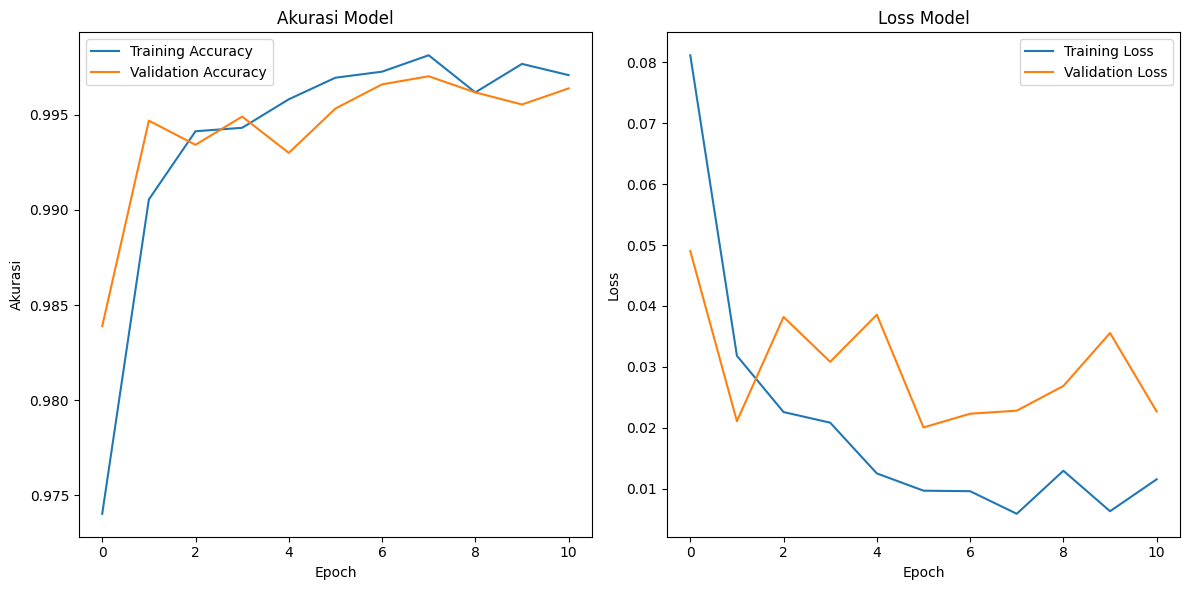

In [14]:
# Plot Akurasi
plt.figure(figsize=(12, 6))


# Akurasi Training dan Validation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import classification_report
import numpy as np

# Prediksi pada testing set
y_pred = model.predict(test_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Ambil label asli (true labels) dari testing set
y_true = test_gen.labels  # Asumsi test_gen.classes berisi label yang benar

# Menampilkan classification report
report = classification_report(y_true, y_pred_classes)
print(report)

148/148 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1665
           1       1.00      1.00      1.00      1503
           2       1.00      1.00      1.00      1553

    accuracy                           1.00      4721
   macro avg       1.00      1.00      1.00      4721
weighted avg       1.00      1.00      1.00      4721



## Konversi Model

In [16]:
import tensorflow as tf

# 1. Menyimpan Model dalam Format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Membuat folder untuk menyimpan model TFLite
os.makedirs('tflite', exist_ok=True)

# Menyimpan model TFLite ke file
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model berhasil disimpan dalam format TFLite!")

# Menyimpan label kelas ke file 'label.txt'
class_labels = ['Bird', 'Butterfly', 'Fish']  # Sesuaikan dengan label yang kamu punya
with open('tflite/label.txt', 'w') as f:
    for label in class_labels:
        f.write(f"{label}\n")
print("Label disimpan dalam 'label.txt' di folder TFLite!")

Saved artifact at '/tmp/tmpfcqffs7s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135221808120464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808121232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808124112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808122960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808123536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808124880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808120656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808125264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808125648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808127184: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil d

In [17]:
import os

# 1. Bikin folder tujuan (kalau belum ada)
os.makedirs('saved_model', exist_ok=True)

# 2. Export model ke folder 'saved_model'
model.export('saved_model')

print("✅ Model berhasil disimpan dengan struktur SavedModel standar!")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135221808120464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808121232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808124112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808122960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808123536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808124880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808120656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808125264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808125648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135221808127184: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model berhasil disi

In [18]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [19]:
import tensorflowjs as tfjs

# Menyimpan model ke format TensorFlow.js
tfjs.converters.save_keras_model(model, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


## Inference (Optional)

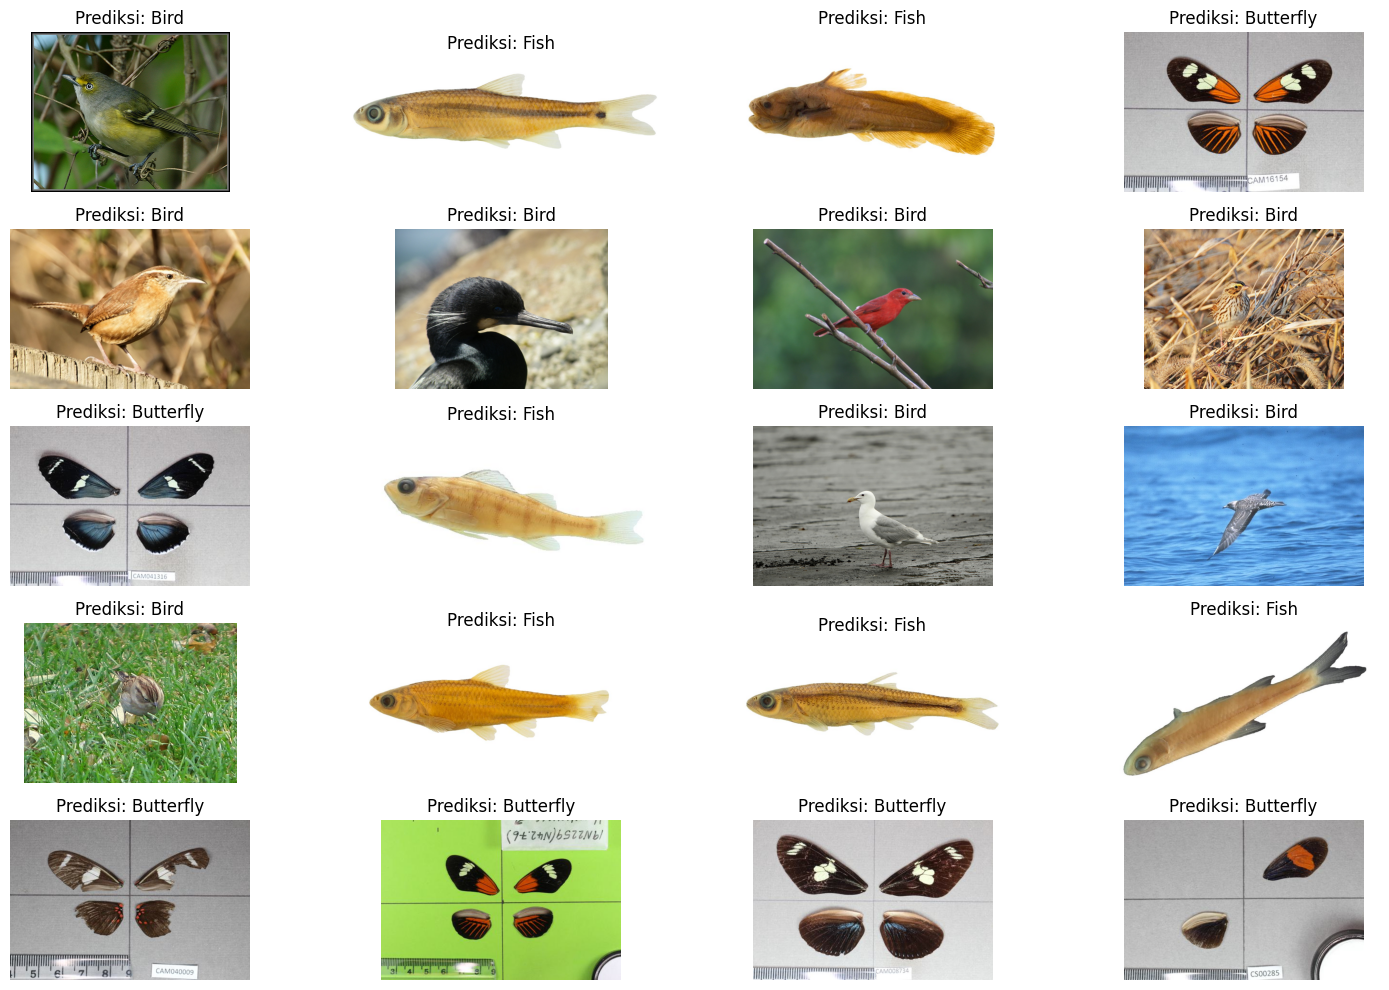

In [31]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

# Fungsi untuk memuat model TFLite
def load_tflite_model(model_path='tflite/model.tflite'):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

# Fungsi untuk memproses gambar agar sesuai dengan input model
def preprocess_image(img_path, target_size=(128, 128)):  # Sesuaikan dengan ukuran input model
    img = image.load_img(img_path, target_size=target_size)  # Mengubah ukuran gambar sesuai input model
    img_array = image.img_to_array(img)  # Mengubah gambar menjadi array numpy
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
    img_array = img_array / 255.0  # Normalisasi gambar
    return img_array

# Fungsi untuk melakukan inferensi dengan model TFLite
def predict_with_tflite(interpreter, img_path):
    input_data = preprocess_image(img_path)  # Persiapkan input
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_data)  # Set input tensor
    interpreter.invoke()  # Jalankan inferensi

    output_data = interpreter.get_tensor(output_details[0]['index'])  # Ambil output
    predicted_class = np.argmax(output_data, axis=1)  # Ambil kelas yang diprediksi
    return predicted_class[0]  # Mengembalikan kelas yang diprediksi

# Fungsi utama untuk menjalankan inferensi pada beberapa gambar
def run_inference(image_paths, model_path='tflite/model.tflite', class_labels=None):
    interpreter = load_tflite_model(model_path)  # Memuat model TFLite

    # Menampilkan gambar dan hasil prediksi
    plt.figure(figsize=(15, 10))  # Sesuaikan ukuran tampilan untuk banyak gambar
    for i, image_path in enumerate(image_paths[:20]):  # Ambil 20 gambar secara acak
        predicted_class = predict_with_tflite(interpreter, image_path)  # Prediksi kelas
        predicted_label = class_labels[predicted_class] if class_labels else str(predicted_class)

        # Menampilkan gambar
        img = Image.open(image_path)
        plt.subplot(5, 4, i+1)  # Membagi tampilan menjadi 5 baris dan 4 kolom
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Prediksi: {predicted_label}")

    plt.tight_layout()
    plt.show()

# Menentukan path dataset
dataset_path = '/content/img_data/10K'
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Daftar label kelas
class_labels = ['Bird', 'Butterfly', 'Fish']  # Ganti dengan label yang sesuai dengan modelmu

# Mengumpulkan gambar dari seluruh kelas
image_paths = []
for class_name in class_folders:
    class_path = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    # Tambahkan gambar ke dalam daftar
    if len(image_files) > 0:
        image_paths.extend([os.path.join(class_path, img) for img in image_files])

# Pastikan ada cukup gambar untuk diuji (20 gambar)
if len(image_paths) >= 20:
    random.shuffle(image_paths)  # Acak gambar-gambar tersebut
    run_inference(image_paths, model_path='tflite/model.tflite', class_labels=class_labels)
else:
    print("Jumlah gambar kurang dari 20. Tidak ada cukup gambar untuk diuji.")


### Install Requirement Dan Simpan Model ke Lokal

In [32]:
!pip freeze > requirements.txt

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [39]:
drive_path = '/content/drive/MyDrive/modelku/'
os.makedirs(drive_path, exist_ok=True)

In [41]:
!cp -r saved_model/ /content/drive/MyDrive/modelku/
!cp -r tfjs_model/ /content/drive/MyDrive/modelku/
!cp -r tflite/ /content/drive/MyDrive/modelku/